# Baseline for PR curve

# Import statements

In [327]:
# Computing
import numpy as np
from docutils.nodes import classifier
from sklearn.metrics import PrecisionRecallDisplay

# Model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_random_state

# Visualization
import matplotlib.pyplot as plt

# Typing
from typing import List, Tuple

In [328]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Population for experiments

In [329]:
pos_exp_1 = 100
neg_exp_1 = 100

pos_exp_2 = 100
neg_exp_2 = 1000

pos_exp_3 = 1000
neg_exp_3 = 100000

mu = 0
variance = 1

## Dummy uniformly random classifier

In [330]:
class RandomClassifier(BaseEstimator, TransformerMixin):
    """This estimator ignores its input and returns random uniform probabilities.
    """

    def __init__(self, n_components=2):
        self.n_components = n_components

    def fit(self, X=None, y=None):
        pass

    def transform(self, X):
        n_samples = X.shape[0]
        return np.random.normal(mu, variance, size=(n_samples, self.n_components))

    def predict_proba(self, X):
        n_samples = X.shape[0]
        return np.random.normal(mu, variance, size=(n_samples, self.n_components))

    def predict(self, X):
        n_samples = X.shape[0]
        return np.argmax(np.random.normal(mu, variance, size=(n_samples, self.n_components)), axis=1)

In [331]:
def fit_classifier(no_pos, no_neg):
    classifier = RandomClassifier(n_components=2)
    x = np.random.randint(2, size=(no_pos + no_neg))
    y = np.concatenate([np.ones(no_pos), np.zeros(no_neg)])
    classifier.fit(x, y)

    return classifier, x, y

In [332]:
classifier1, x1, y1 = fit_classifier(pos_exp_1, neg_exp_1)
classifier2, x2, y2 = fit_classifier(pos_exp_2, neg_exp_2)
classifier3, x3, y3 = fit_classifier(pos_exp_3, neg_exp_3)

In [333]:
def plot_distribution(classifier_input_pairs: List[Tuple[BaseEstimator, np.ndarray]]):
    fig, axes = plt.subplots(nrows=1, ncols=len(classifier_input_pairs), figsize=(12, 8))

    for ax, (cls, x) in zip(axes, classifier_input_pairs):
        count, bins, ignored = ax.hist(cls.predict_proba(x), 30, density=True)
        ax.plot(bins, 1/(variance*np.sqrt(2*np.pi))*
                np.exp(- (bins - mu) ** 2/(2*variance ** 2)),
                linewidth=2, color='r')
        ax.set_title(f"N={x.shape}")
    plt.show()

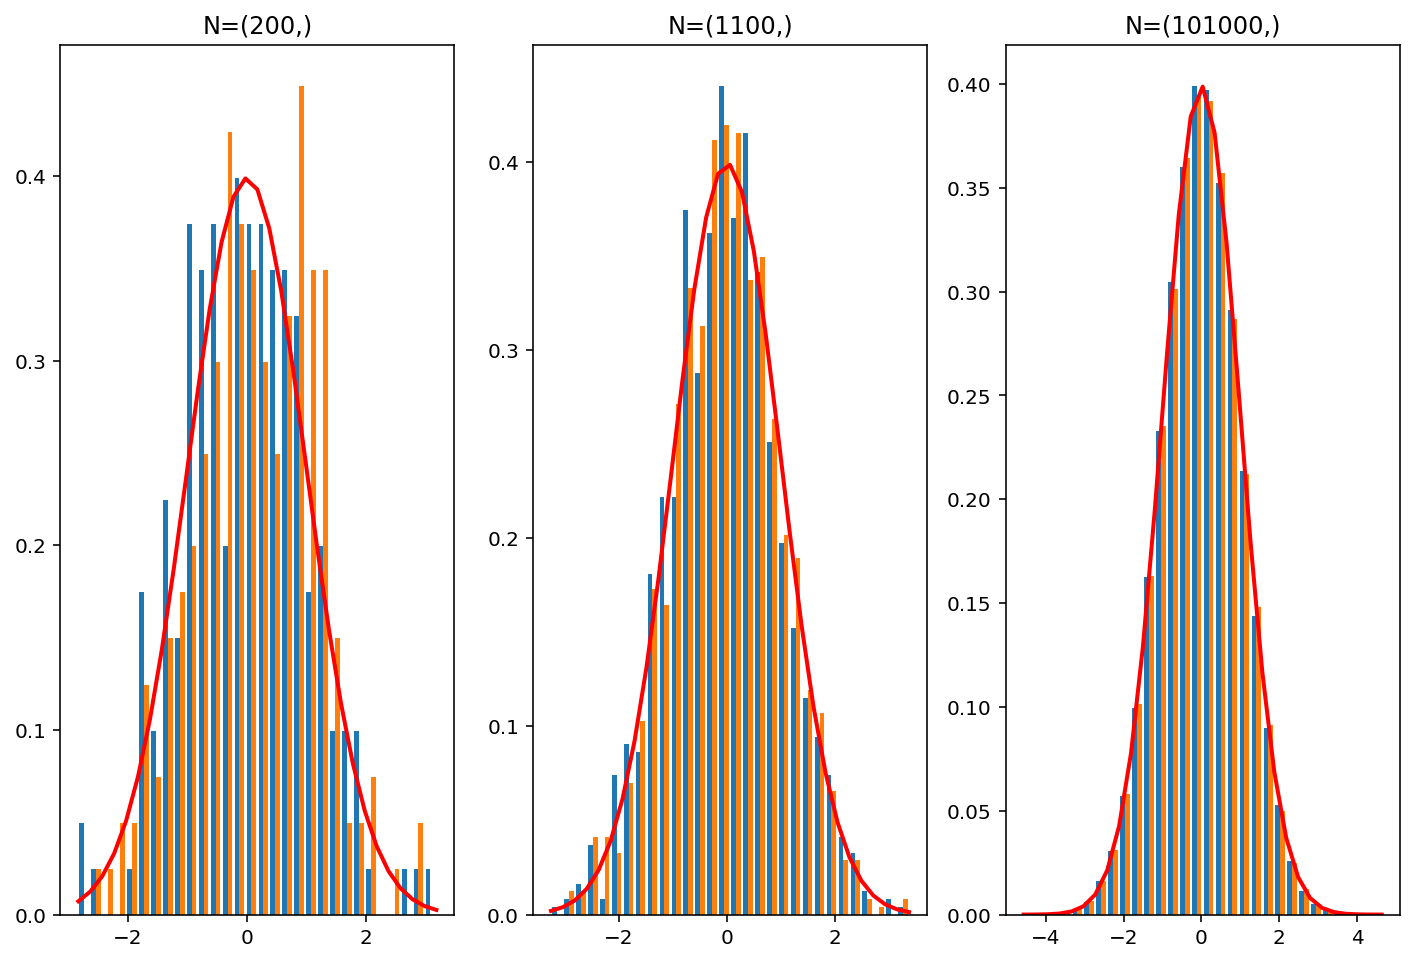

In [334]:
plot_distribution([(classifier1, x1), (classifier2, x2), (classifier3, x3)])

In [335]:
def plot_PR_curve(classifier_input_pairs: List[Tuple[BaseEstimator, np.ndarray, np.ndarray]]):
    fig, axes = plt.subplots(nrows=1, ncols=len(classifier_input_pairs), figsize=(12, 8))
    for ax, (cls, x, y) in zip(axes, classifier_input_pairs):
        PrecisionRecallDisplay.from_predictions(y, classifier1.predict_proba(x)[:, 1], ax=ax)
        unique, counts = np.unique(y, return_counts=True)
        ax.legend(loc='upper right')
        ax.axhline(y=np.divide(counts[1], counts[0] + counts[1]), color='r', linestyle=':')
        ax.set_title(f"P/N={np.divide(counts[1], counts[0] + counts[1]):.4}")
    plt.show()

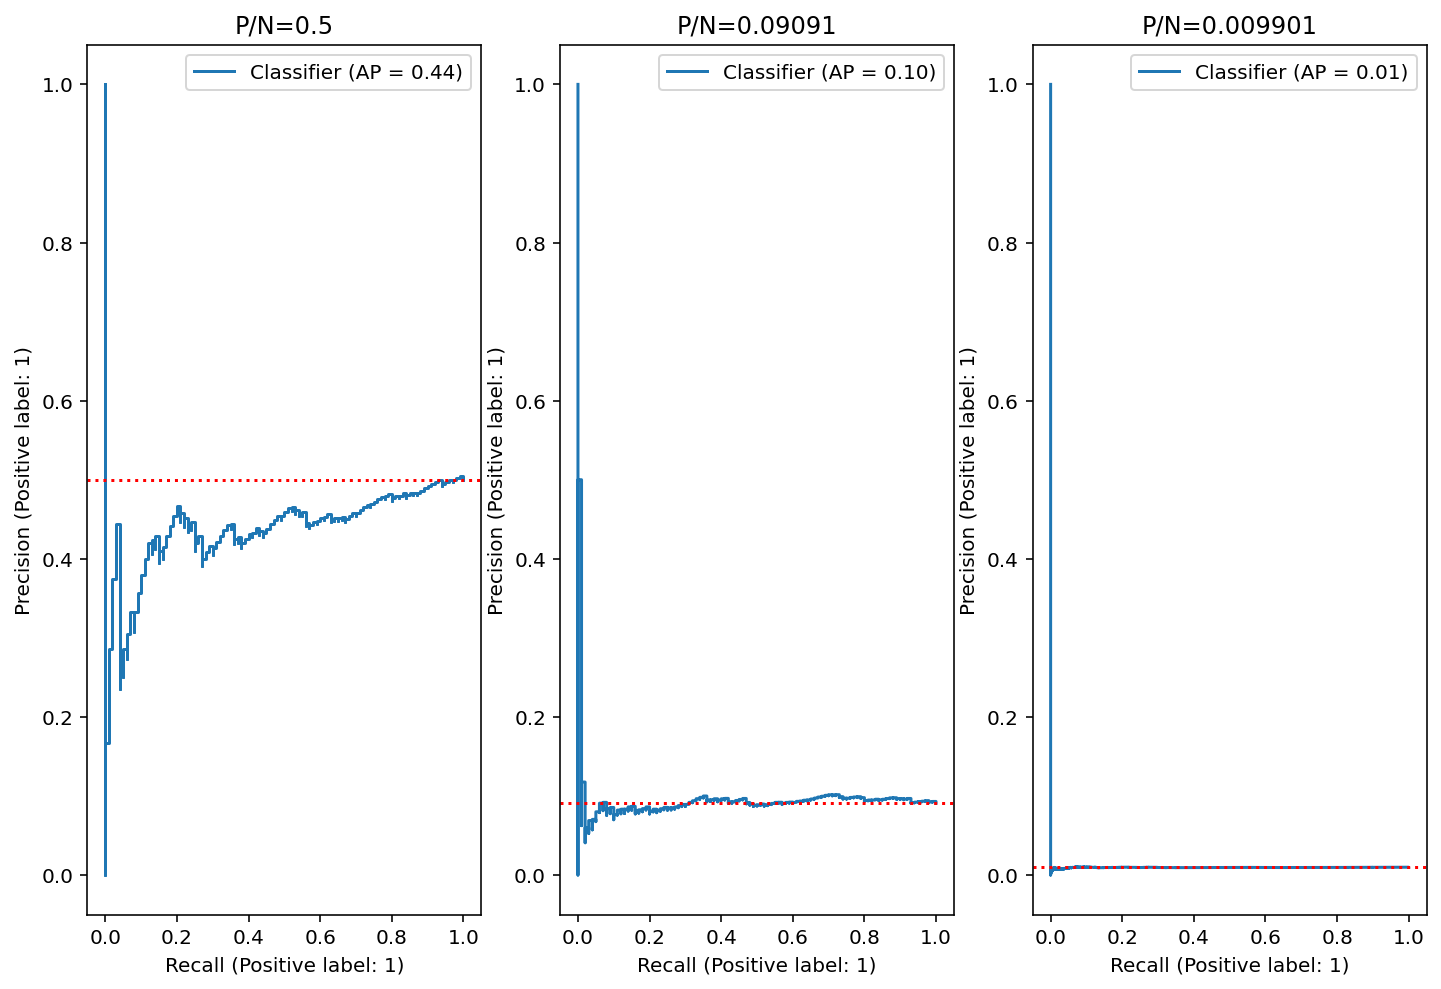

In [336]:
plot_PR_curve([(classifier1, x1, y1), (classifier2, x2, y2), (classifier3, x3, y3)])